# Proyek Analisis Data: Air-quality-dataset
- **Nama:** M. Abdan Syakura
- **Email:** mabdansya@gmail.com
- **ID Dicoding:** m_abdansya

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Bagaimana tren pencemaran udara yang terjadi dalam beberapa tahun terakhir?
- Pertanyaan 2
  Daerah mana yang memiliki tingkat polusi tertinggi?
- Pertanyaan 3
  Adakah faktor yang memengaruhi kenaikan temperatur secara signifikan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data
##### Pada tahap ini, semua data yang dibutuhkan (dataset kualitas udara) dikumpulkan

In [2]:
# list untuk menyimpan dataset
air_quality_datasets = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# Memuat masing-masing dataset
# Menghapus feature 'No' agar data dapat diproses dengan mudah
df = {}
for i, dataset in enumerate(air_quality_datasets):
    df[i] = pd.read_csv(dataset)
    df[i].drop(labels='No', axis=1, inplace=True)

#Membuat variabel dataframe agar mudah dibaca
aotizhongxin_df = df[0]
changping_df = df[1]
dingling_df = df[2]
dongsi_df = df[3]
guanyuan_df = df[4]
gucheng_df = df[5]
huairou_df = df[6] 
nongzhanguan_df = df[7]
shunyi_df = df[8]
tiantan_df = df[9]
wanliu_df = df[10]
wanshouxigong_df = df[11]

In [3]:
#Cek variabel dataframe
aotizhongxin_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
# Menggabungkan semua dataframe dalam variabel dataframe baru
all_df = pd.concat([aotizhongxin_df,
                    changping_df,
                    dingling_df,
                    dongsi_df,
                    guanyuan_df,
                    gucheng_df,
                    huairou_df,
                    nongzhanguan_df,
                    shunyi_df, 
                    tiantan_df,
                    wanliu_df,
                    wanshouxigong_df], ignore_index=True)

In [5]:
# menambahkan kolom id sebagai identifier tiap baris untuk dataframe yang telah digabung
id = all_df.index + 1
all_df.insert(loc=0, column='id', value=id)
all_df['id'] = all_df.id.astype(str)
all_df

,id,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,420764,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,420765,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,420766,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,420767,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data
##### Menilai kualitas data air quality (all_df)

In [6]:
# Cek missing values pada data
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       420768 non-null  object 
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB


##### Jika diperhatikan terdapat perbedaan pada jumlah data pada kolom PM2.5, PM10, SO2, NO2, CO, 03, TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Hal ini menunjukkan adanya missing values pada kolom tersebut.

In [7]:
# Hitung missing values setiap kolom
all_df.isna().sum()

id             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [8]:
# Memeriksa jumlah duplikasi data
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Mengetahui ringkasan parameter statistik data
all_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data
##### Membersihkan data all_df (cleaning data) yang sebelumnya terindikasi memiliki banyak value missing untuk beberapa kolomnya

In [10]:
# Menentukan metode yang digunakan dalam menangani missing values
all_df[all_df.RAIN.isna()]
all_df[all_df.CO.isna()]

,id,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420709,420710,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
420731,420732,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,420733,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,420734,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong


##### Berdasarkan data yang diperoleh, baris dengan missing values mengandung banyak informasi yang sayang jika langsung dibuang.
##### Data air quality ini merupakan data series sehingga cocok untuk menggunakan metode interpolation.
##### Khusus untuk kolom wd (wind direction) yang merupakan kolom kategorik, cocok untuk menggunakan metode imputation

In [11]:
# Menangani missing values pada kolom wd
all_df.wd.value_counts()
# Diketahui nilai paling dominan dalam kolom wd yaitu "NE"
all_df.wd.fillna(value="NE", inplace=True)
# Cek apakah berjalan dengan semestinya
all_df.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12960\4055765149.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df.wd.fillna(value="NE", inplace=True)


id             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd             0
WSPM         318
station        0
dtype: int64

In [12]:
# Missing values pada kolom lain ditangani menggunakan metode interpolation linier
all_df.interpolate(method='linear', limit_direction='forward', inplace=True)
# Cek apakah berjalan dengan semestinya
all_df.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12960\385777657.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_df.interpolate(method='linear', limit_direction='forward', inplace=True)


id         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [13]:
# Menggabungkan year, month, day, hour pada kolom datetime
datetime = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])
all_df.insert(loc=1, column='datetime', value=datetime)
# Periksa parameter statistik saat ini
all_df.describe()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674


In [14]:
#Menyimpan berkas yang telah dibersihkan
all_df.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Dataset Air Quality


In [15]:
all_df.describe(include="all")

,id,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,420768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,NaN,2015-03-01 11:30:00.000001024,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
min,NaN,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,NaN,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,NaN,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,NaN,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN
max,NaN,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN


In [16]:
# Membagi Bentuk Polusi
particle_pollution = all_df[['PM2.5', 'PM10']].sum(axis=1)
gas_pollution = all_df[['NO2', 'CO', 'SO2', 'O3']].sum(axis=1)

all_df.insert(loc=12, column='particle_pollution', value=particle_pollution)
all_df.insert(loc=12, column='gas_pollution', value=gas_pollution)

In [17]:
# Tren Polusi Udara berdasarkan Tahun
all_df.groupby(by="year").agg({
    "particle_pollution" : ["max", "min", "mean", "std"],
    "gas_pollution" : ["max", "min", "mean", "std"]
})

particle_pollution                              gas_pollution         \
                    max  min        mean         std           max    min   
year                                                                        
2013             1369.0  4.0  182.967950  147.788115       10354.0  108.0   
2014             1716.0  6.0  203.004785  172.563909       10137.0  108.0   
2015             1650.0  6.0  182.961445  174.224589       10231.0  106.0   
2016             1809.0  6.0  166.830136  157.840675       10210.0  107.0   
2017             1774.0  6.0  203.288695  235.056905       10288.0  119.0   

                                
             mean          std  
year                            
2013  1333.617922   944.243252  
2014  1405.278479  1136.991850  
2015  1382.518978  1308.387019  
2016  1252.093750  1121.190411  
2017  1732.768803  1822.832823

In [18]:
# Mengkategorikan jumlah polusi berdasarkan daerah (station)
all_df.groupby(by="station").agg({
    "particle_pollution" : ["max", "min", "mean", "std"],
    "gas_pollution" : ["max", "min", "mean", "std"]
})

particle_pollution                              gas_pollution  \
                             max  min        mean         std           max   
station                                                                       
Aotizhongxin         1658.500000  6.0  192.750656  171.632749       10231.0   
Changping            1557.666667  6.0  165.775013  150.767043       10139.0   
Dingling             1474.000000  5.0  150.959270  148.022388       10134.0   
Dongsi               1609.000000  6.0  196.491861  179.280803       10183.0   
Guanyuan             1581.000000  6.0  192.269871  168.418972       10221.0   
Gucheng              1761.000000  4.0  203.336369  173.639453       10288.0   
Huairou              1656.000000  5.0  161.924417  150.685021       10198.0   
Nongzhanguan         1774.000000  6.0  194.463494  178.345209       10189.0   
Shunyi               1619.000000  6.0  178.709898  167.280737       10166.0   
Tiantan              1809.000000  6.0  188.570173  166.471877       10162.0   
Wanliu               1710.000000  5.0  194.175471  170.325591       10354.0   
Wanshouxigong        1756.000000  6.0  197.573343  178.858848        9958.0   

                                                
                 min         mean          std  
station                                         
Aotizhongxin   139.0  1396.554388  1259.489797  
Changping      108.0  1274.115719  1139.365717  
Dingling       107.0  1034.744810   908.124827  
Dongsi         144.0  1462.072621  1189.657450  
Guanyuan       141.0  1388.892797  1174.040172  
Gucheng        136.0  1467.641886  1232.214715  
Huairou        107.0  1125.068000   906.054192  
Nongzhanguan   154.0  1463.055643  1279.322139  
Shunyi         106.0  1309.664137  1180.834069  
Tiantan        119.0  1429.250185  1193.131612  
Wanliu         119.0  1459.748487  1284.028430  
Wanshouxigong  153.0  1502.397304  1250.432230

In [19]:
# Faktor yang memengaruhi temperatur udara
all_df.groupby(by="TEMP").agg({
    "PM2.5" : "mean",
    "PM10" : "mean",
    "SO2" : "mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean",
})

,PM2.5,PM10,SO2,NO2,CO,O3
TEMP,,,,,,
-19.9,4.000000,23.000000,2.0000,4.000000,300.000000,44.000000
-19.7,7.000000,7.000000,2.0000,6.000000,400.000000,44.000000
-19.5,8.000000,10.000000,2.0000,7.000000,400.000000,42.000000
-18.9,6.000000,11.000000,2.0000,2.000000,300.000000,46.000000
-18.7,10.000000,32.000000,4.0000,20.000000,700.000000,29.000000
...,...,...,...,...,...,...
40.9,12.000000,50.000000,5.0000,30.000000,400.000000,199.000000
41.0,18.500000,31.000000,5.5000,9.000000,150.000000,140.500000
41.1,23.666667,40.166667,6.6623,32.353448,366.666667,211.666667


In [20]:
print("Korelasi dari faktor tersebut terhadap temperatur sebagai berikut.")
print(all_df[["TEMP", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].corr())

Korelasi dari faktor tersebut terhadap temperatur sebagai berikut.
           TEMP     PM2.5      PM10       SO2       NO2        CO        O3
TEMP   1.000000 -0.131607 -0.096078 -0.320237 -0.277279 -0.324057  0.592248
PM2.5 -0.131607  1.000000  0.878874  0.478223  0.664306  0.780165 -0.149508
PM10  -0.096078  0.878874  1.000000  0.460572  0.645583  0.691887 -0.110443
SO2   -0.320237  0.478223  0.460572  1.000000  0.495826  0.522678 -0.165311
NO2   -0.277279  0.664306  0.645583  0.495826  1.000000  0.694036 -0.465912
CO    -0.324057  0.780165  0.691887  0.522678  0.694036  1.000000 -0.306979
O3     0.592248 -0.149508 -0.110443 -0.165311 -0.465912 -0.306979  1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pencemaran udara yang terjadi dalam beberapa tahun terakhir?

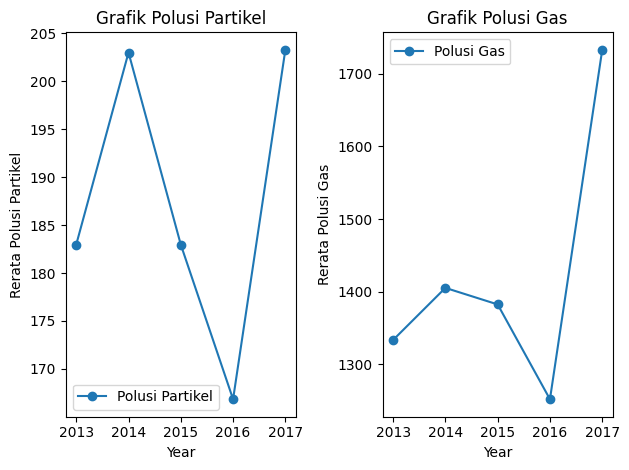

In [21]:
pollution_df = all_df.groupby(by="year").agg({
    "particle_pollution" : "mean",
    "gas_pollution" : "mean"
})

plt.subplot(1, 2, 1)
plt.plot(pollution_df.index, pollution_df["particle_pollution"], marker='o', linestyle='-', label='Polusi Partikel')
plt.title('Grafik Polusi Partikel')
plt.xlabel('Year')
plt.ylabel('Rerata Polusi Partikel')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pollution_df.index, pollution_df["gas_pollution"], marker='o', linestyle='-', label='Polusi Gas')
plt.title('Grafik Polusi Gas')
plt.xlabel('Year')
plt.ylabel('Rerata Polusi Gas')
plt.legend()

# Menampilkan grafik
plt.tight_layout()  # Menjaga jarak antar subplot agar rapi
plt.show()

##### Berdasarkan dari grafik di atas, polusi partikel berbahaya melonjak dengan begitu tinggi pada periode tahun 2016 - 2017 dari sebelumnya turun secara signifikan dari tahun 2014 - 2016.
##### Berdasarkan dari grafik di atas, polusi gas berbahaya sangat melonjak di tahun 2017 melebihi tahun-tahun sebelumnya.

### Pertanyaan 2: Daerah mana yang memiliki tingkat polusi tertinggi?

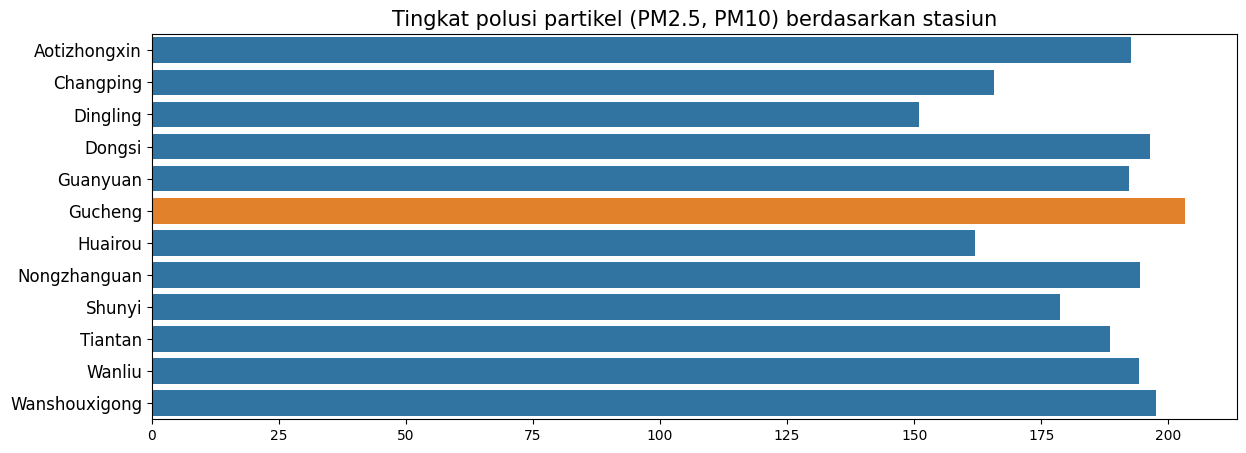

In [22]:
bystation_df = all_df.groupby(by="station").agg({
    "particle_pollution" : "mean",
    "gas_pollution" : "mean"
})

plt.figure(figsize=(14, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="particle_pollution", 
    y=bystation_df.index,
    data=bystation_df,
    hue=colors_,
    legend=False
)
plt.title("Tingkat polusi partikel (PM2.5, PM10) berdasarkan stasiun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

##### Dari visual data di atas terlihat bahwa kota Gucheng merupakan kota dengan rata-rata polusi partikel tertinggi dibandingkan kota lainnya.

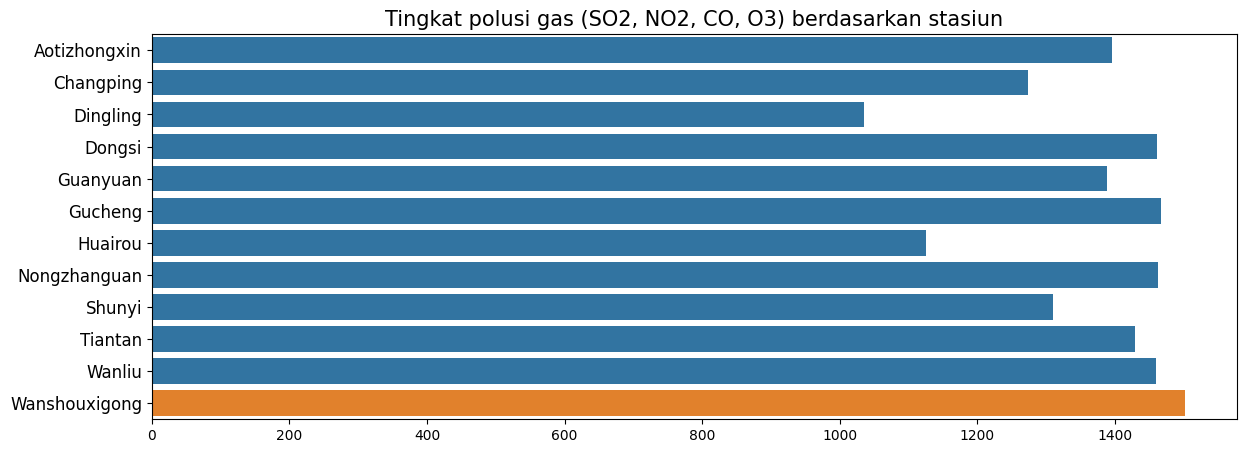

In [23]:
bystation_df = all_df.groupby(by="station").agg({
    "particle_pollution" : "mean",
    "gas_pollution" : "mean"
})

plt.figure(figsize=(14, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(
    x="gas_pollution", 
    y=bystation_df.index,
    data=bystation_df,
    hue=colors_,
    legend=False
)
plt.title("Tingkat polusi gas (SO2, NO2, CO, O3) berdasarkan stasiun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

##### Dari visual data di atas terlihat bahwa kota Wanshouxigong merupakan kota dengan rata-rata polusi gas tertinggi dibandingkan kota lainnya.

### Pertanyaan 3: Adakah faktor yang memengaruhi kenaikan temperatur secara signifikan?

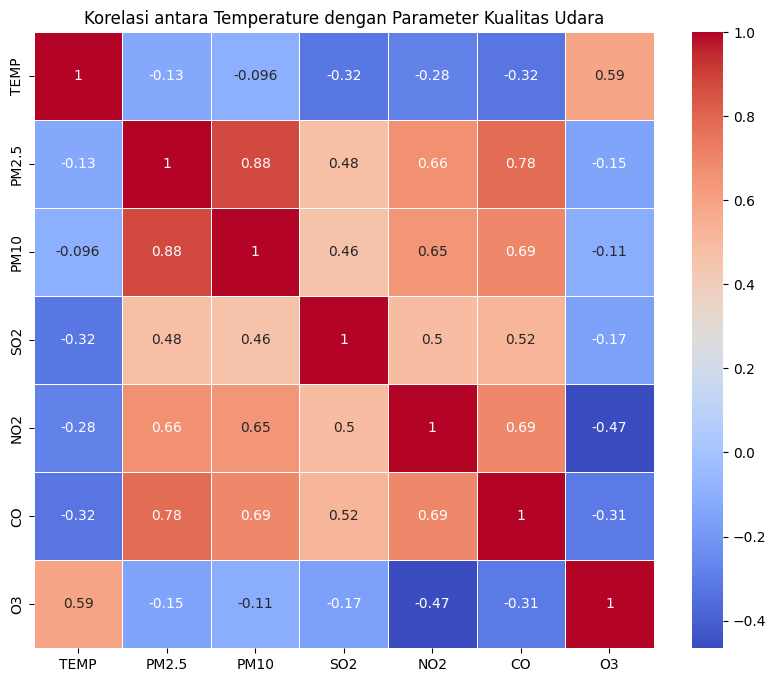

In [24]:
# Buat visualisasi untuk menentukan korelasi temperature dengan parameter lainnya
correlation_matrix = all_df[["TEMP", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasi antara Temperature dengan Parameter Kualitas Udara')
plt.show()

##### Berdasarkan visualisasi tersebut, temperature dipengaruhi secara signifikan oleh kandungan O3 dengan korelasi positif.

## Conclusion

- Conclusion pertanyaan 1: Tren pencemaran udara dalam beberapa tahun terakhir menunjukkan terjadinya lonjakan yang begitu besar baik dari polusi partikel maupun gas, terutama lonjakan polusi gas di tahun 2017 yang memecahkan rekor tertinggi dari tahun-tahun sebelumnya.
- Conclution pertanyaan 2:
  Berdasarkan hasil di atas, dapat dilihat bahwa produksi polusi partikel berbahaya paling banyak berada di kota Gucheng disusul oleh kota Wanshouxigong dan Dongsi. Sedangkan, kota dengan penghasil polusi gas terbanyak yaitu kota Wanshouxigong. Data ini dapat dipakai dalam menentukan kebijakan kota untuk mengurangi produksi polusi.
- Conclusion pertanyaan 3: Kenaikan temperatur yang terjadi dipengaruhi oleh kandungan O3 dengan korelasi positif sebesar 59%. Sedangkan, kandungan parameter lainnya justru berkorelasi negatif dan tidak berpengaruh secara signifikan.
  